In [2]:
import time
import statistics


In [3]:
import numpy as np

In [4]:
import jax

In [5]:
from jax import jvp, grad

In [6]:
from sympy import * 


In [7]:
import matplotlib.pyplot as plt


In [8]:
import pandas as pd

**QUESTION 1**<br>
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
<br><br>
**ANSWER**<br>
Matrix one size= n X k <br>
Matrix two size= k X m <br>
Final Matrix shape= n X m <br>
For each element in the final matrix we will multiply one row of Matrix 1 with one column of Matrix 2 element wise and then add them<br><br>
Number of multiplications for one element of final matrix =k ------------- eq 1<br>
Number of additions for one element of final matrix =k-1 ------------------eq 2<br><br>

So for total additions in final array= number of elements* additions in one array<br>
Total number of additions= n*m*(k-1)<br><br>

So for total multiplications in final array= number of elements* multiplication in one array<br>
Total number of multiplications= n*m*(k)<br>



**Question 2**<br>
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



**PART 1**<br>
With simple python lists

In [ ]:

def matrix_generator(n,k,m):
  # n=5
  # k=3
  # m=2
  matrix1=[]
  matrix2=[]
  for i in range(n):
    arr=[]
    for j in range(k):
      arr.append(1)
    matrix1.append(arr)

  for i in range(k):
    arr=[]
    for j in range(m):
      arr.append(1)
    matrix2.append(arr)
  return matrix1,matrix2

In [ ]:
def matrix_multiply(matrix1,matrix2):

  n_=len(matrix1)
  k_=len(matrix1[0])
  m_=len(matrix2[0])
  final_arr=[]

  for i in range(n_):
    arr=[]
    for j in range(m_):
      value=0
      for k in range(k_):
        value+=matrix1[i][k]*matrix2[k][j]
      arr.append(value)
    final_arr.append(arr)

  return final_arr

In [ ]:
mat1,mat2=matrix_generator(5,3,2)

matrix_multiply(mat1,mat2)


[[3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]

In [ ]:
n_array=[2,5,30,100]
m_array=[2,5,30,100]
k_array=[2,5,30,100]
time_array=[]
for run in range(5):
  for n in n_array:
    for m in m_array:
      for k in k_array:
        matrix1,matrix2=matrix_generator(n,m,k)
        t1=time.time()
        final_matrix=matrix_multiply(matrix1,matrix2)
        t2=time.time()
        time_array.append(t2-t1)





In [ ]:
avg=statistics.mean(time_array)
std_=statistics.stdev(time_array)
print("Average  :",avg)
print("Std   :",std_)

Average  : 0.006473752856254578
Std   : 0.02155536533988385


**Numpy Question 2**

In [ ]:
n_array=[2,5,30,100]
m_array=[2,5,30,100]
k_array=[2,5,30,100]
time_array_numpy=[]
for run in range(1000):
  for n in n_array:
    for m in m_array:
      for k in k_array:
        matrix1,matrix2=matrix_generator(n,m,k)
        t1=time.time()
        final_matrix=np.matmul(np.array(matrix1),np.array(matrix2))
        t2=time.time()
        time_array_numpy.append(t2-t1)


In [ ]:
avg_numpy=statistics.mean(time_array_numpy)
std_numpy=statistics.stdev(time_array_numpy)
print("Average Numpy :",avg_numpy)
print("Std  Numpy :",std_numpy)

Average Numpy : 0.00028036013245582583
Std  Numpy : 0.0005002221103717588


**Time for normal list**<br>
Average  : 0.006473752856254578<br>
Std   : 0.02155536533988385<br>

**Time by using numpy**<br>
Average Numpy : 0.0.00028036013245582583<br>
Std  Numpy : 0.0.0005002221103717588<br>

**Reason why numpy is faster is beacuse in numpy the array values are stored continously in memory whereas this is not the case for normal python list. Numpy also does operations parallelly**
 

**Question 3**<br>
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?




**Time Complexity**<br>
The time complexity would be O(n**2)<br>
A better method would be sorting the array and directly finding the median based on the size  of array<br>
Then time complexity would become O(nlog(n)) [Time complexty of only sorting] 



**Below we have written python median finder for the method described in the question withut sorting**

In [ ]:
def median_finder(array_):
  
  arr_length=len(array_)
  if(arr_length%2==0):
    half=arr_length//2
    
    for i in range(half+1):##iterating till we find both elements
      max=array_[i]
      max_index=i
      for j in range(i,arr_length):#find the index where we have a max
        if(max<array_[j]):
          max=array_[j]
          max_index=j
      temp=array_[max_index]
      array_[max_index]=array_[i]
      array_[i]=temp

    median=(array_[half-1]+array_[half])/2## finding the median
  else:
    half=arr_length//2
    for i in range(half+1):##to find the median
      max=array_[i]
      max_index=i
      for j in range(i,arr_length):#find the index where we have a max
        if(max<array_[j]):
          max=array_[j]
          max_index=j
      temp=array_[max_index]
      array_[max_index]=array_[i]
      array_[i]=temp

    median=array_[half]## finding the median
  return median

In [ ]:
#array_=[1, 2, 3, 4, 5, 6]
array_=[1, 2, 3, 4, 5]
median_finder(array_)

3

**Below is the impplementation of the sorted median finder**(the python sort is of O(NlogN)

In [ ]:
def sorting_median_finder(array_):
  
  arr_length=len(array_)
  array_.sort()
  if(arr_length%2==0):
    half=arr_length//2
    median=(array_[half-1]+array_[half])/2
  else:
    half=arr_length//2
    median=array_[half]
    
  return median

In [ ]:
array_=[1, 2, 3, 4, 5, 6]
#array_=[1, 2, 3, 4, 5]
sorting_median_finder(array_)

3.5

In [ ]:
time_normal=[]
time_sorted=[]
time_numpy=[]

sizes=[5,10,100,1000]

for run in range(10):
  for i in range(len(sizes)):
    array = np.random.randint(10, size=(sizes[i]))
    t1=time.time()## finding time for normal method
    median_normal=median_finder(array)
    t2=time.time()
    time_normal.append(t2-t1)

    t1=time.time()##finding time for sortign method
    median_normal=sorting_median_finder(array)
    t2=time.time()
    time_sorted.append(t2-t1)

    t1=time.time()##time for numpy
    median_numpy=np.median(array)
    t2=time.time()
    time_numpy.append(t2-t1)




In [ ]:
print("Average time for normal median finding", statistics.mean(time_normal))
print("Average time for sorted median finding", statistics.mean(time_sorted))
print("Average time for numpy median finding", statistics.mean(time_numpy))

Average time for normal median finding 0.014049416780471802
Average time for sorted median finding 2.7489662170410156e-05
Average time for numpy median finding 8.449554443359374e-05


Average time for normal median finding 0.014049416780471802 secs<br>
Average time for sorted median finding 2.7489662170410156e-05 secs<br>
Average time for numpy median finding 8.449554443359374e-05 secs<br>

Question 4:What is the gradient of the following function with respect to x and y?<br>

$f(x,y)= x^2y + y^3sin(x)$ <br><br>
**Answer**<br>
$df/dx=2xy + y^3cos(x)$<br>
$df/dy=x^2 + 3y^2sin(x)$<br>

In [ ]:
def d_dx(x,y):
  return (2*x*y)+(y**3)*np.cos(x)


def d_dy(x,y):
  return (x**2) + (3*(y**2))*np.sin(x)

**Q-5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**



In [ ]:
def function_f(x,y):
  return ((x**2)*(y))+(y**3)*jax.numpy.sin(x)

In [ ]:
dfdx=d_dx(2,3)
dfdy=d_dy(2,3)
grad_jax_dx=jax.grad(function_f,argnums=0)
grad_jax_dy=jax.grad(function_f,argnums=1)


In [ ]:
print("df/dx self function:",dfdx, " df/dx for jax: ",grad_jax_dx(2.0,3.0))

df/dx self function: 0.7640354132271554  df/dx for jax:  0.7640352


In [ ]:
print("df/dy self function:",dfdy, " df/dy for jax: ",grad_jax_dy(2.0,3.0))

df/dy self function: 28.551030524293406  df/dy for jax:  28.55103


**Q6- Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
x, y = symbols('x y')
expression=((x**2)*(y))+((y**3)*(sin(x)))

In [ ]:
diff_x=Derivative(expression, x)  
diff_y=Derivative(expression, y)  

In [ ]:
print("Derivative of expression with respect to x : {}".format(diff_x.doit()))  
print("Derivative of expression with respect to y : {}".format(diff_y.doit()))  

Derivative of expression with respect to x : 2*x*y + y**3*cos(x)
Derivative of expression with respect to y : x**2 + 3*y**2*sin(x)


**Q9- Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

In [ ]:
array_domain=np.arange(0.5,100,0.5)

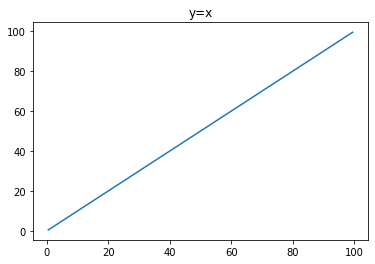

In [ ]:
plt.plot(array_domain,array_domain)
plt.title("y=x")
plt.show()

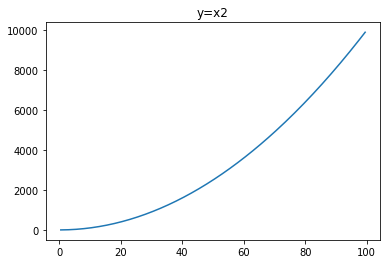

In [ ]:
plt.plot(array_domain,np.square(array_domain))
plt.title("y=x2")
plt.show()

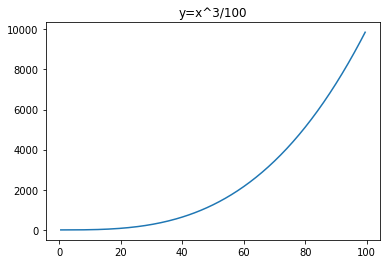

In [ ]:
plt.plot(array_domain,(array_domain**3)/100)
plt.title("y=x^3/100")
plt.show()

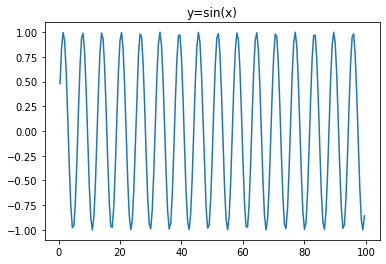

In [ ]:
plt.plot(array_domain,np.sin(array_domain))
plt.title("y=sin(x)")
plt.show()

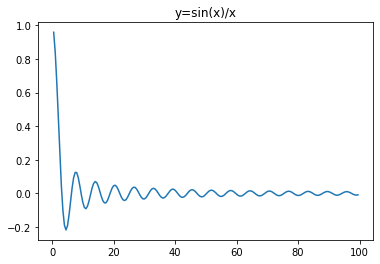

In [ ]:
plt.plot(array_domain,np.sin(array_domain)/array_domain)
plt.title("y=sin(x)/x")
plt.show()

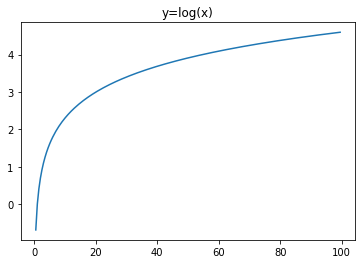

In [ ]:
plt.plot(array_domain,np.log(array_domain))
plt.title("y=log(x)")
plt.show()

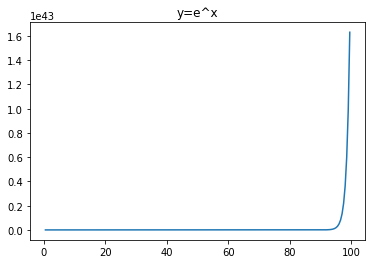

In [ ]:
plt.plot(array_domain,np.exp(array_domain))
plt.title("y=e^x")
plt.show()

**Question -10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from .............**

In [9]:
np.random.seed(42)

In [10]:
numpy_matrix=np.random.uniform(low=1,high=2,size=(20,5))

In [11]:
dict_df={'a':numpy_matrix[:,0],'b':numpy_matrix[:,1],'c':numpy_matrix[:,2],'d':numpy_matrix[:,3],'e':numpy_matrix[:,4]}

In [12]:
df=pd.DataFrame(dict_df)


In [13]:
array_means=[df['a'].mean(),df['b'].mean(),df['c'].mean(),df['d'].mean(),df['e'].mean()]
array_std=[df['a'].std(),df['b'].std(),df['c'].std(),df['d'].std(),df['e'].std()]
print(array_means)
print(array_std)

[1.522890799092147, 1.4369455033861906, 1.4740846561091414, 1.4987368233245257, 1.418245934979042]
[0.2964588113484114, 0.2977939627660935, 0.31862833120007994, 0.30711297309552393, 0.28446258750014697]


Column 'e' has the highest mean and column 'c' has highest standard deviation

**Question -11 Add a new column to the dataframe called “f” which is..........**


In [14]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']
df['g']=df['f'].apply(lambda x: "GT8" if x > 8 else "LT8")

In [15]:
print(df)

           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.074551  1.98

In [16]:
df_gt=df[df['g']=="GT8"]
df_lt=df[df['g']=="LT8"]


In [17]:
print(df_gt)

           a         b         c         d         e         f    g
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
17  1.325183  1.729606  1.637557  1.887213  1.472215  8.051775  GT8


In [18]:
print(df_lt)

           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802197  1.074551  1.986887  7.547255  LT8
14  1.772245  1.198716  1.005522  1.815461  1.70

In [19]:
print("Number of rows in LT8  :",len(df_lt))

Number of rows in LT8  : 18


In [20]:
## NUMBER OF ROWS 
print("GT8  number of rows",len(df_gt), "With the std of f column :",df_gt['f'].std())
print("LT8 number of rows",len(df_lt), "With the std of f column :",df_lt['f'].std())

GT8  number of rows 2 With the std of f column : 0.7956146881961926
LT8 number of rows 18 With the std of f column : 0.4025886500663061


**Q- 12 :  Write a small piece of code to explain broadcasting in numpy.**



In [21]:
# numpy array broadcasting is how numpy handles operations on arrays of different sizes
##With examples
## we can perform operations  them if amongst the dimension which does not match is 1
#example of multiplication and addition/\
mat1=np.random.randint(10,size=(3,4,1))
mat2=np.random.randint(10,size=(4,5))
fin=mat1+mat2
fin2=mat1*mat2
print(fin.shape)
print(fin2.shape)

(3, 4, 5)
(3, 4, 5)


In [22]:
## we can perform operations them if they have same shape
##example multiplication
mat1=np.random.randint(10,size=(3,4,10))
mat2=np.random.randint(10,size=(3,4,10))
fin3=mat1*mat2
print(fin3.shape)

(3, 4, 10)


**Question -13 : Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [23]:
def argmin_fun(array_):
  min_index=0
  min=array_[0]
  for i in range(len(array_)):
    if(min>array_[i]):
      min=array_[i]
      min_index=i
  
  return min_index

In [24]:
print("Argmin function result :",argmin_fun([3,42,1937,1,81,31,-45]))
print("Numpy argmin :",np.argmin([3,42,1937,1,81,31,-45]))

Argmin function result : 6
Numpy argmin : 6


**Question -7 : Create a Python nested dictionary to represent hierarchical information. We want to store record of students and..........**

In [25]:
big_dict={}
for i in range(4):
  year_dict={}
  for j in range(2):
    branch_dict={}
    for k in range(2):
      person_dict={'Roll No':(i,j,k),'Name':'Abc'}
      marks={'Maths': 100,'English':75,'History':75}
      person_dict['Marks']=marks
      branch_dict[str(k)]=person_dict
    year_dict['Branch '+str(j+1)]=branch_dict
  big_dict[str(2022+i)]=year_dict

In [26]:
big_dict['2022']['Branch 1']

{'0': {'Roll No': (0, 0, 0),
  'Name': 'Abc',
  'Marks': {'Maths': 100, 'English': 75, 'History': 75}},
 '1': {'Roll No': (0, 0, 1),
  'Name': 'Abc',
  'Marks': {'Maths': 100, 'English': 75, 'History': 75}}}

**Question 8: Store the same information using Python classes. We have an overall**

In [27]:
class Subject():
  def __init__(self, name,marks):
    self.name=name
    self.marks=marks
  
class Marks():
  def __init__(self):
    self.Mark_list=[]
  
class Student():
  def __init__(self,name,roll_no,Mark_class):
    self.name=name
    self.roll_no=roll_no
    self.Mark_sub=Mark_class
  
class Branch():
  def __init__(self,name):
    self.name=name
    self.student_list=[]
  
class Year():
  def __init__(self,year):
    self.year=year
    self.branch_list=[]
  

In [28]:
math=Subject('maths',100)
history=Subject("History",75)
english=Subject('English',81)


In [29]:
marks_=Marks()
marks_.Mark_list=[math,history,english]

In [30]:
student1=Student('abc',56,marks_)

In [31]:
print(student1.Mark_sub.Mark_list[0].name)

maths


In [32]:
branch_1=Branch('Branch 1')
branch_1.student_list.append(student1)

In [33]:
print(branch_1.name)
print("Printing student name in the branch :",branch_1.student_list[0].name)


Branch 1
Printing student name in the branch : abc


In [34]:
year_2022=Year(2022)
year_2022.branch_list.append(branch_1)
print(year_2022.year)


2022


In [35]:
branch_=year_2022.branch_list[0]
print("Printing the name of the branch inside the Year:",branch_.name)

Printing the name of the branch inside the Year: Branch 1
